# Notebook to test the computation of angles

## Imports

In [1]:
import os
import sys
import json
import numpy as np
from matplotlib import pyplot as plt

## Gloabal variables

In [2]:
id_joints_dict = {0: 'nose',
        1: 'left_eye',
        2: 'right_eye',
        3: 'left_ear',
        4: 'right_ear',
        5: 'left_shoulder',
        6: 'right_shoulder',
        7: 'left_elbow',
        8: 'right_elbow',
        9: 'left_wrist',
        10: 'right_wrist',
        11: 'left_hip',
        12: 'right_hip',
        13: 'left_knee',
        14: 'right_knee',
        15: 'left_ankle',
        16: 'right_ankle'}
joints_id_dict = {v: k for k, v in id_joints_dict.items()}

## Load the poses

In [3]:
file_name = 'tibs.mp4'
with open('../outputs/predictions/' + file_name.split('.')[0] + '.json', 'r') as f:
    print(f.name)
    predictions1 = json.load(f)

../outputs/predictions/tibs.json


In [4]:
file_name = 'baseball.jpg'
with open('../outputs/predictions/' + file_name.split('.')[0] + '.json', 'r') as f:
    print(f.name)
    predictions2 = json.load(f)

../outputs/predictions/baseball.json


In [5]:
file_name = '2people.mov'
with open('../outputs/predictions/' + file_name.split('.')[0] + '.json', 'r') as f:
    print(f.name)
    predictions3 = json.load(f)

../outputs/predictions/2people.json


## Compute the angles

In [6]:
def calculate_angle(a, b, c):

    """
    Calculates the angle between three joints.

    Args:
        a (tuple): coordinates of the first joint
        b (tuple): coordinates of the second joint
        c (tuple): coordinates of the third joint

    Returns:
        angle (float): angle between the three joints
    """
    
    ba = np.array(a) - np.array(b)
    bc = np.array(c) - np.array(b)

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

In [7]:
def show_angles(a, b, c):

    angle = calculate_angle(a, b, c)

    plt.scatter(a[0], a[1], c='r')
    plt.scatter(b[0], b[1], c='r')
    plt.scatter(c[0], c[1], c='r')

    plt.plot([a[0], b[0]], [a[1], b[1]], c='b')
    plt.plot([b[0], c[0]], [b[1], c[1]], c='b')

    plt.text(b[0], b[1], str(angle))

    plt.show()

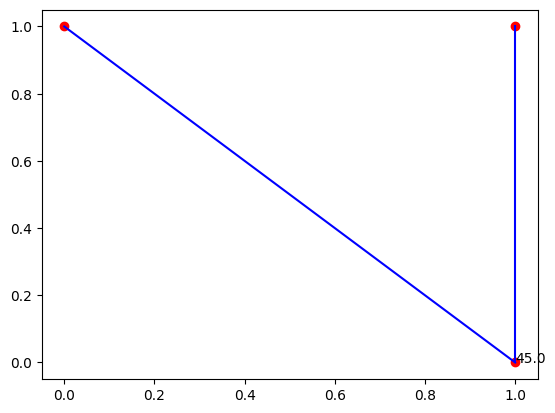

In [8]:

a = (1,1)
b = (1,0)
c = (0,1)
show_angles(a, b, c)

In [9]:
def compute_left_knee_angle(pose):

    """
    Computes the knee angle.

    Args:
        pose (dict): pose dictionary

    Returns:
        knee_angle (float): knee angle
    """

    left_hip = pose['keypoints'][joints_id_dict['left_hip']]
    left_knee = pose['keypoints'][joints_id_dict['left_knee']]
    left_ankle = pose['keypoints'][joints_id_dict['left_ankle']]

    knee_angle = calculate_angle(left_hip, left_knee, left_ankle)

    return knee_angle

def compute_right_knee_angle(pose):

    """
    Computes the knee angle.

    Args:
        pose (dict): pose dictionary

    Returns:
        knee_angle (float): knee angle
    """

    right_hip = pose['keypoints'][joints_id_dict['right_hip']]
    right_knee = pose['keypoints'][joints_id_dict['right_knee']]
    right_ankle = pose['keypoints'][joints_id_dict['right_ankle']]

    knee_angle = calculate_angle(right_hip, right_knee, right_ankle)

    return knee_angle

def compute_left_hip_angle(pose):

    """
    Computes the left hip angle.

    Args:
        pose (dict): pose dictionary

    Returns:
        hip_angle (float): hip angle
    """

    left_shoulder = pose['keypoints'][joints_id_dict['left_shoulder']]
    left_hip = pose['keypoints'][joints_id_dict['left_hip']]
    left_knee = pose['keypoints'][joints_id_dict['left_knee']]

    hip_angle = calculate_angle(left_shoulder, left_hip, left_knee)

    return hip_angle

def compute_right_hip_angle(pose):
    
        """
        Computes the right hip angle.
    
        Args:
            pose (dict): pose dictionary
    
        Returns:
            hip_angle (float): hip angle
        """
    
        right_shoulder = pose['keypoints'][joints_id_dict['right_shoulder']]
        right_hip = pose['keypoints'][joints_id_dict['right_hip']]
        right_knee = pose['keypoints'][joints_id_dict['right_knee']]
    
        hip_angle = calculate_angle(right_shoulder, right_hip, right_knee)
    
        return hip_angle

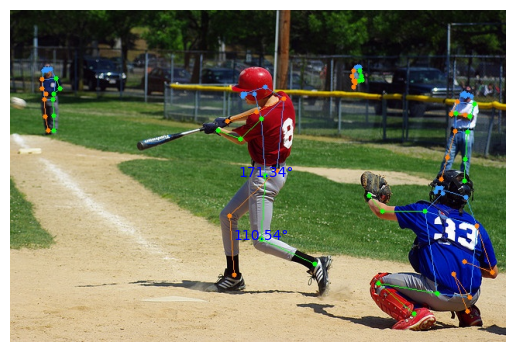

In [10]:
from PIL import Image

img = Image.open('../outputs/visualizations/baseball.jpg')
left_knee_angle = round(compute_left_knee_angle(predictions2[0]), 2)
left_hip_angle = round(compute_left_hip_angle(predictions2[0]), 2)

fig, ax = plt.subplots()
ax.text(*predictions2[0]['keypoints'][joints_id_dict['left_knee']], str(left_knee_angle) + '°', fontsize=10, ha='center', color='b')
ax.text(*predictions2[0]['keypoints'][joints_id_dict['left_hip']], str(left_hip_angle) + '°', fontsize=10, ha='center', color='b')
ax.axis('off')
ax.imshow(img)

## Structure of the predictions

pred[frame id]['instances'][instance id]['keypoints']

In [11]:
print(predictions3[200].keys())
predictions3[200]['instances'][1]

dict_keys(['frame_id', 'instances'])


{'keypoints': [[1017.2477312088013, 665.8237504959106],
  [1010.1859769821167, 644.6384878158569],
  [996.0624685287476, 644.6384878158569],
  [911.3214178085327, 658.7619962692261],
  [904.2596635818481, 658.7619962692261],
  [939.568434715271, 778.8118181228638],
  [819.5186128616333, 799.9970808029175],
  [960.7536973953247, 962.4174280166626],
  [960.7536973953247, 920.0469026565552],
  [1010.1859769821167, 1061.2819871902466],
  [967.8154516220093, 771.7500638961792],
  [932.5066804885864, 1054.220232963562],
  [840.703875541687, 1075.4054956436157],
  [1073.7417650222778, 1131.8995294570923],
  [1059.6182565689087, 1216.6405801773071],
  [897.1979093551636, 1287.2581224441528],
  [890.136155128479, 1308.4433851242065]],
 'keypoint_scores': [0.9343743324279785,
  0.9056726694107056,
  0.9247875213623047,
  0.43180352449417114,
  0.9282734394073486,
  0.6862936019897461,
  0.8306562900543213,
  0.7422142028808594,
  0.7761942148208618,
  0.9193325042724609,
  0.8893725275993347,
  

## Compute the angles list

In [12]:
def compute_angles(pose_sequences):

    angles_list = []

    for frame in pose_sequences:

        angles_dict = {}
        angles_dict['frame_id'] = frame['frame_id']
        angles_dict['instances'] = []

        for instance in frame['instances']:

            left_knee_angle = compute_left_knee_angle(instance)
            right_knee_angle = compute_right_knee_angle(instance)
            left_hip_angle = compute_left_hip_angle(instance)
            right_hip_angle = compute_right_hip_angle(instance)

            angles_dict['instances'].append({'left_knee_angle': left_knee_angle,
                                    'right_knee_angle': right_knee_angle,
                                    'left_hip_angle': left_hip_angle,
                                    'right_hip_angle': right_hip_angle})
        
        angles_list.append(angles_dict)

    return angles_list

In [13]:
angles_list = compute_angles(predictions1)

## Plot the results

In [16]:
import pandas as pd

left_knee_angles = []
right_knee_angles = []
left_hip_angles = []
right_hip_angles = []

for frame in angles_list:
    left_knee_angles.append(frame['instances'][0]['left_knee_angle'])
    right_knee_angles.append(frame['instances'][0]['right_knee_angle'])
    left_hip_angles.append(frame['instances'][0]['left_hip_angle'])
    right_hip_angles.append(frame['instances'][0]['right_hip_angle'])

df = pd.DataFrame({'left_knee_angle': left_knee_angles,
                    'right_knee_angle': right_knee_angles,
                    'left_hip_angle': left_hip_angles,
                    'right_hip_angle': right_hip_angles})
df.head()


,left_knee_angle,right_knee_angle,left_hip_angle,right_hip_angle
0,177.510447,175.914383,177.709390,177.954591
1,177.510447,175.914383,177.709390,177.954592
2,177.510447,178.516945,177.709390,177.397438
3,177.510447,173.583363,177.709390,175.352029
4,175.020894,180.000000,177.510447,177.954592


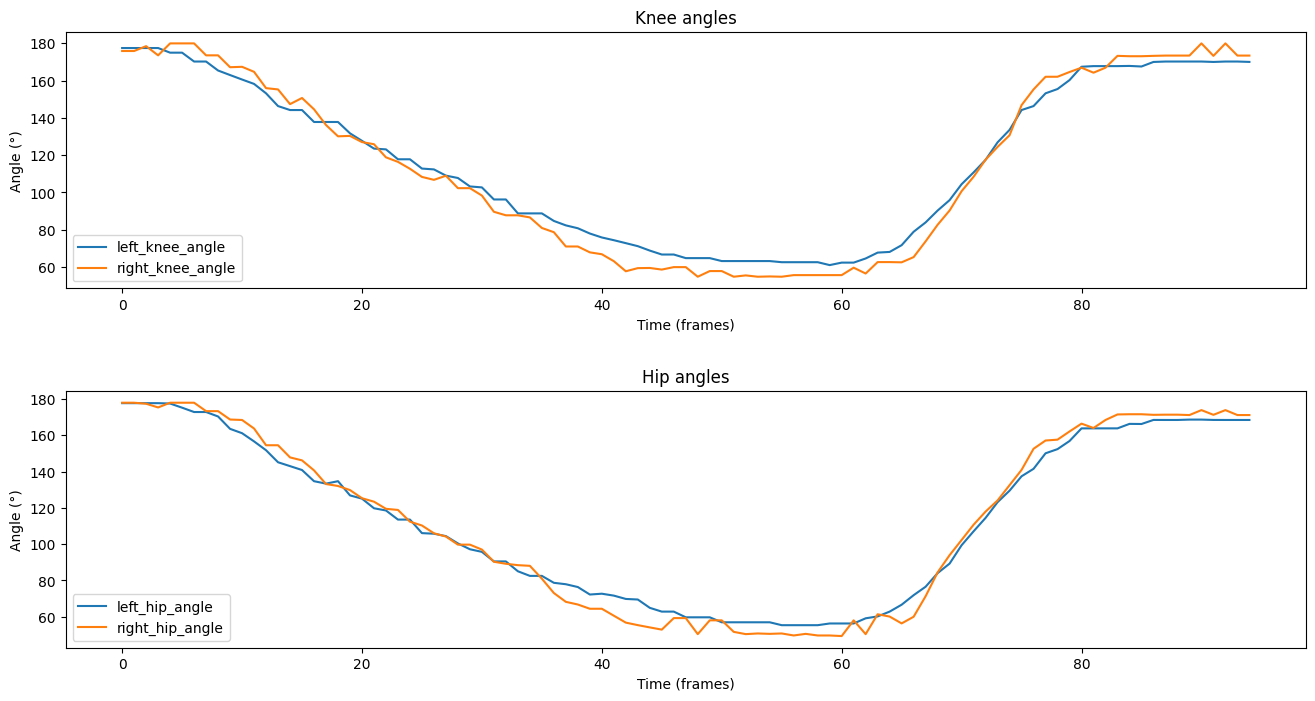

In [26]:
import seaborn as sns

fig, ax = plt.subplots(2, 1, figsize=(16, 8))

sns.lineplot(x=df.index, y=df['left_knee_angle'], ax=ax[0], label='left_knee_angle')
sns.lineplot(x=df.index, y=df['right_knee_angle'], ax=ax[0], label='right_knee_angle')
ax[0].set_title('Knee angles')
ax[0].set_ylabel('Angle (°)')
ax[0].set_xlabel('Time (frames)')

sns.lineplot(x=df.index, y=df['left_hip_angle'], ax=ax[1], label='left_hip_angle')
sns.lineplot(x=df.index, y=df['right_hip_angle'], ax=ax[1], label='right_hip_angle')
ax[1].set_title('Hip angles')
ax[1].set_ylabel('Angle (°)')
ax[1].set_xlabel('Time (frames)')

plt.subplots_adjust(hspace = 0.4)